# Challenge


# 1. Knowledge domain
# 2. Exploratory analysis
# 3. Machine learning model
## 3.1. First approach
## 3.2. Second approach
# 4. Result of the competition
# References

------------------

En este notebook:

## 3.2. Second approach
### Knn
### Decision Tree
### Gaussian NB
### Random Forest
# 4. Result of the competition
# References

--------------

## 3.2. Second approach

### Cargo Valores

In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

import warnings
warnings.filterwarnings('ignore')

# data = pd.read_csv('data/train.csv', sep=",", encoding = "ISO-8859-1")
# df = data.copy()

data_test_nolabel = pd.read_csv('data/test_nolabel.csv', sep=",", encoding = "ISO-8859-1")
df_test_nolabel = data_test_nolabel.copy()

In [118]:
data_test_nolabel = pd.read_csv('data/test_nolabel.csv', sep=",", encoding = "ISO-8859-1")
df_test_nolabel = data_test_nolabel.copy()

### Cambios en Features

### DisbursementDate

In [119]:
# drop ChgOffDate column
#df.drop(['ChgOffDate'], axis=1, inplace=True)
df.drop(['State'], axis=1, inplace=True)
df.drop(['BalanceGross'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

# drop ChgOffDate column
#df_test_nolabel.drop(['ChgOffDate'], axis=1, inplace=True)
df_test_nolabel.drop(['State'], axis=1, inplace=True)
df_test_nolabel.drop(['BalanceGross'], axis=1, inplace=True)
#df_test_nolabel.drop(['id'], axis=1, inplace=True)

KeyError: "['State'] not found in axis"

In [120]:
#Change the format into datetime
df['DisbursementDate'] = pd.to_datetime(data['DisbursementDate'])

#Change the format into datetime
df_test_nolabel['DisbursementDate'] = pd.to_datetime(data['DisbursementDate'])

In [121]:
df['DisbursementDay'] = df['DisbursementDate'].apply(lambda x: x.day)

df_test_nolabel['DisbursementDay'] = df_test_nolabel['DisbursementDate'].apply(lambda x: x.day)

In [122]:
df['DisbursementMonth'] = df['DisbursementDate'].apply(lambda x: x.month)
df_test_nolabel['DisbursementMonth'] = df_test_nolabel['DisbursementDate'].apply(lambda x: x.month)

In [123]:
df['DisbursementYear'] = df['DisbursementDate'].apply(lambda x: x.year)
df_test_nolabel['DisbursementYear'] = df_test_nolabel['DisbursementDate'].apply(lambda x: x.year)

In [124]:
# We can now delete the 'DisbursementDate' column.
df.drop(['DisbursementDate'], axis=1, inplace=True)
# We can now delete the 'DisbursementDate' column.
df_test_nolabel.drop(['DisbursementDate'], axis=1, inplace=True)

### ApprovalDate

In [125]:
#Change the format into datetime
df['ApprovalDate'] = pd.to_datetime(data['ApprovalDate'])
#Change the format into datetime
df_test_nolabel['ApprovalDate'] = pd.to_datetime(data['ApprovalDate'])

In [126]:
df['ApprovalDay'] = df['ApprovalDate'].apply(lambda x: x.day)
df['ApprovalMonth'] = df['ApprovalDate'].apply(lambda x: x.month)
df['ApprovalYear'] = df['ApprovalDate'].apply(lambda x: x.year)

df_test_nolabel['ApprovalDay'] = df_test_nolabel['ApprovalDate'].apply(lambda x: x.day)
df_test_nolabel['ApprovalMonth'] = df_test_nolabel['ApprovalDate'].apply(lambda x: x.month)
df_test_nolabel['ApprovalYear'] = df_test_nolabel['ApprovalDate'].apply(lambda x: x.year)

In [127]:
# We can now delete the 'ApprovalDate' column.
df.drop(['ApprovalDate'], axis=1, inplace=True)
# We can now delete the 'ApprovalDate' column.
df_test_nolabel.drop(['ApprovalDate'], axis=1, inplace=True)

### DisbursementGross

In [128]:
def clean_currency(x):
   
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [129]:
df['DisbursementGross'] = df['DisbursementGross'].apply(clean_currency).astype('float')
df_test_nolabel['DisbursementGross'] = df_test_nolabel['DisbursementGross'].apply(clean_currency).astype('float')

### ChgOffDate

In [130]:
df['ChgOffDate'] = df['ChgOffDate'].fillna(1)

for i in range(len(df)):
    if df['ChgOffDate'][i] != 1 :
        df['ChgOffDate'][i] = 0   

df['ChgOffDate'] = df['ChgOffDate'].astype(int)

df_test_nolabel['ChgOffDate'] = df_test_nolabel['ChgOffDate'].fillna(1)

for i in range(len(df_test_nolabel)):
    if df_test_nolabel['ChgOffDate'][i] != 1 :
        df_test_nolabel['ChgOffDate'][i] = 0   
        
df_test_nolabel['ChgOffDate'] = df_test_nolabel['ChgOffDate'].astype(int)

In [131]:
df.head(10)

LoanNr_ChkDgt Name         City                            Bank BankState  \
0     6340864010    0       ODESSA     WELLS FARGO BANK NATL ASSOC        SD   
1     1670916004    1       KELLER     WELLS FARGO BANK NATL ASSOC        CA   
2     7568313003    2      EL PASO      BANK OF AMERICA NATL ASSOC        TX   
3     4585814005    3  SAN ANTONIO                    COMPASS BANK        AL   
4     2003866003    4       ODESSA                  SOUTHWEST BANK        TX   
5     6816864006    5   FORT WORTH       BUSINESS LOAN CENTER, LLC        SC   
6     7479744008    6    ARLINGTON                  COMMUNITY BANK        TX   
7     3075105006    7   CEDAR HILL  JPMORGAN CHASE BANK NATL ASSOC        IL   
8     7362314004    8      MIDLAND                 PROSPERITY BANK        TX   
9     3204516004    9       AUSTIN                    COMPASS BANK        AL   

  ApprovalFY  NoEmp  NewExist  CreateJob  RetainedJob  ...  LowDoc  \
0       2003     10       1.0          2           10  ...       N   
1       2006      1       1.0          0            1  ...       N   
2       1994      5       2.0          0            0  ...       Y   
3       2001      1       2.0          3            1  ...       N   
4       2006      5       1.0          0            5  ...       N   
5       2004     24       1.0         20            4  ...       N   
6       2004      8       1.0          0            8  ...       N   
7       2008      1       1.0          1            1  ...       N   
8       2004      3       2.0          0            0  ...       Y   
9       2008      1       1.0          0            1  ...       N   

   ChgOffDate DisbursementGross Accept  DisbursementDay  DisbursementMonth  \
0           1          150000.0      1             30.0                6.0   
1           1          250000.0      1             31.0                7.0   
2           1           53000.0      1             31.0               10.0   
3           1          170000.0      1             31.0                8.0   
4           1          121000.0      1             31.0                5.0   
5           1         1111000.0      1             31.0               10.0   
6           1          150000.0      1             30.0                6.0   
7           0          122026.0      0             31.0                5.0   
8           0           85000.0      0             30.0                4.0   
9           0           13844.0      0              1.0                6.0   

   DisbursementYear  ApprovalDay  ApprovalMonth  ApprovalYear  
0            2003.0           22              5          2003  
1            2006.0            7              4          2006  
2            1994.0           12              9          1994  
3            2001.0           18              6          2001  
4            2006.0           12              5          2006  
5            2003.0           20             10          2003  
6            2004.0           28              5          2004  
7            2008.0            2              5          2008  
8            2004.0           16              4          2004  
9            2010.0           25              3          2008  

[10 rows x 23 columns]

## Name

In [ ]:
name = []

lista_1 = dict()
for i in range (0, 49320): 
    name.append(df['Name'][i])
    
for j in range (0, 49320):
        
    if df['Name'][j] not in lista_1: 
        c = name[j]
        df['Name'][j] = j
        lista_1[c] = j
        print(c)
        print(df['Name'][j])
        print(lista_1)
        
    else :
        df['Name'][j] = lista_1[df['Name'][j]]

0
0
{0: 0}
1
1
{0: 0, 1: 1}
2
2
{0: 0, 1: 1, 2: 2}
3
3
{0: 0, 1: 1, 2: 2, 3: 3}
4
4
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
5
5
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
6
6
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
7
7
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}
8
8
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
9
9
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
10
10
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}
11
11
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}
12
12
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12}
13
13
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
14
14
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14}
15
15
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}
16
16
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7

191
191
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 1

316
316
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 1

432
432
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 1

533
533
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 1

642
642
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




2304
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 121

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
name = []

lista_1 = dict()
for i in range (0, 7994): 
    name.append(df_test_nolabel['Name'][i])
    
for j in range (0, 7994):
        
    if df_test_nolabel['Name'][j] not in lista_1: 
        c = name[j]
        df_test_nolabel['Name'][j] = j
        lista_1[c] = j
        print(c)
        print(df_test_nolabel['Name'][j])
        print(lista_1)
        
    else :
        df_test_nolabel['Name'][j] = lista_1[df_test_nolabel['Name'][j]]

## Bank

In [ ]:
name_bank = []
lista = dict()

for i in range (0, 49320):
    name_bank.append(df['Bank'][i])
    
for j in range (0, 49320):
    
    if df['Bank'][j] not in lista:
        c = name_bank[j]
        df['Bank'][j] = j
        lista[c] = j
        print(c)
        print(df['Bank'][j])
        print(lista)
        
    else :
        df['Bank'][j] = lista[df['Bank'][j]]
        
name_bank = []
lista = dict()

for i in range (0, 7994):
    name_bank.append(df_test_nolabel['Bank'][i])
    
for j in range (0, 7994):
    
    if df_test_nolabel['Bank'][j] not in lista:
        c = name_bank[j]
        df_test_nolabel['Bank'][j] = j
        lista[c] = j
        print(c)
        print(df_test_nolabel['Bank'][j])
        print(lista)
        
    else :
        df_test_nolabel['Bank'][j] = lista[df_test_nolabel['Bank'][j]]

In [ ]:
City = []
lista_2 = dict()

for i in range (0, 49320):
    City.append(df['City'][i])
    
for j in range (0, 49320):
    
    if df['City'][j] not in lista_2:
        c = City[j]
        df['City'][j] = j
        lista_2[c] = j
        print(c)
        print(df['City'][j])
        print(lista_2)
        
    else :
        df['City'][j] = lista_2[df['City'][j]]
        

City = []
lista_2 = dict()

for i in range (0, 7994):
    City.append(df_test_nolabel['City'][i])
    
for j in range (0, 7994):
    
    if df_test_nolabel['City'][j] not in lista_2:
        c = City[j]
        df_test_nolabel['City'][j] = j
        lista_2[c] = j
        print(c)
        print(df_test_nolabel['City'][j])
        print(lista_2)
        
    else :
        df_test_nolabel['City'][j] = lista_2[df_test_nolabel['City'][j]]

## BankState

In [ ]:
BankState = []
lista_4 = dict()

for i in range (0, 49320):
    BankState.append(df['BankState'][i])
    
for j in range (0, 49320):

    if df['BankState'][j] not in lista_4:
        c = BankState[j]
        df['BankState'][j] = j
        lista_4[c] = j
        print(c)
        print(df['BankState'][j])
        print(lista_4)
        
    else :
        df['BankState'][j] = lista_4[df['BankState'][j]]
        
BankState = []
lista_4 = dict()

for i in range (0, 7994):
    BankState.append(df_test_nolabel['BankState'][i])
    
for j in range (0, 7994):

    if df_test_nolabel['BankState'][j] not in lista_4:
        c = BankState[j]
        df_test_nolabel['BankState'][j] = j
        lista_4[c] = j
        print(c)
        print(df_test_nolabel['BankState'][j])
        print(lista_4)
        
    else :
        df_test_nolabel['BankState'][j] = lista_4[df_test_nolabel['BankState'][j]]

## ApprovalFY

In [ ]:
ApprovalFY = []
lista_6 = dict()

for i in range (0, 49320):
    ApprovalFY.append(df['ApprovalFY'][i])
    
for j in range (0, 49320):
    
    if df['ApprovalFY'][j] not in lista_6:
        c = ApprovalFY[j]
        df['ApprovalFY'][j] = j
        lista_6[c] = j
        print(c)
        print(df['ApprovalFY'][j])
        print(lista_6)
        
    else :
        df['ApprovalFY'][j] = lista_6[df['ApprovalFY'][j]]
        
ApprovalFY = []
lista_6 = dict()

for i in range (0, 7994):
    ApprovalFY.append(df_test_nolabel['ApprovalFY'][i])
    
for j in range (0, 7994):
    
    if df_test_nolabel['ApprovalFY'][j] not in lista_6:
        c = ApprovalFY[j]
        df_test_nolabel['ApprovalFY'][j] = j
        lista_6[c] = j
        print(c)
        print(df_test_nolabel['ApprovalFY'][j])
        print(lista_6)
        
    else :
        df_test_nolabel['ApprovalFY'][j] = lista_6[df_test_nolabel['ApprovalFY'][j]]

## RevLineCr

In [ ]:
RevLineCr = []
lista_7 = dict()

for i in range (0, 49320):
    RevLineCr.append(df['RevLineCr'][i])
    
for j in range (0, 49320):
        
    if df['RevLineCr'][j] not in lista_7:
        c = RevLineCr[j]
        df['RevLineCr'][j] = j
        lista_7[c] = j
        print(c)
        print(df['RevLineCr'][j])
        print(lista_7)
        
    else :
        df['RevLineCr'][j] = lista_7[df['RevLineCr'][j]]
        
RevLineCr = []
lista_7 = dict()

for i in range (0, 7994):
    RevLineCr.append(df_test_nolabel['RevLineCr'][i])
    
for j in range (0, 7994):
        
    if df_test_nolabel['RevLineCr'][j] not in lista_7:
        c = RevLineCr[j]
        df_test_nolabel['RevLineCr'][j] = j
        lista_7[c] = j
        print(c)
        print(df_test_nolabel['RevLineCr'][j])
        print(lista_7)
        
    else :
        df_test_nolabel['RevLineCr'][j] = lista_7[df_test_nolabel['RevLineCr'][j]]

## LowDoc

In [ ]:
LowDoc = []
lista_8 = dict()

for i in range (0, 49320):
    LowDoc.append(df['LowDoc'][i])
    
for j in range (0, 49320):
        
    if df['LowDoc'][j] not in lista_8:
        c = LowDoc[j]
        df['LowDoc'][j] = j
        lista_8[c] = j
        print(c)
        print(df['LowDoc'][j])
        print(lista_8)
        
    else :
        df['LowDoc'][j] = lista_8[df['LowDoc'][j]]
        
LowDoc = []
lista_8 = dict()

for i in range (0, 7994):
    LowDoc.append(df_test_nolabel['LowDoc'][i])
    
for j in range (0, 7994):
        
    if df_test_nolabel['LowDoc'][j] not in lista_8:
        c = LowDoc[j]
        df_test_nolabel['LowDoc'][j] = j
        lista_8[c] = j
        print(c)
        print(df_test_nolabel['LowDoc'][j])
        print(lista_8)
        
    else :
        df_test_nolabel['LowDoc'][j] = lista_8[df_test_nolabel['LowDoc'][j]]

In [ ]:
df['Name'] = df['Name'].astype(float)
df['City'] = df['City'].astype(float)
df['Bank'] = df['Bank'].astype(float)
df['BankState'] = df['BankState'].astype(float)
df['ApprovalFY'] = df['ApprovalFY'].astype(float)
df['RevLineCr'] = df['RevLineCr'].astype(float)
df['LowDoc'] = df['LowDoc'].astype(float)

df_test_nolabel['Name'] = df_test_nolabel['Name'].astype(float)
df_test_nolabel['City'] = df_test_nolabel['City'].astype(float)
df_test_nolabel['Bank'] = df_test_nolabel['Bank'].astype(float)
df_test_nolabel['BankState'] = df_test_nolabel['BankState'].astype(float)
df_test_nolabel['ApprovalFY'] = df_test_nolabel['ApprovalFY'].astype(float)
df_test_nolabel['RevLineCr'] = df_test_nolabel['RevLineCr'].astype(float)
df_test_nolabel['LowDoc'] = df_test_nolabel['LowDoc'].astype(float)

In [ ]:
df.dtypes

In [ ]:
df_test_nolabel.dtypes

In [ ]:
(df_test_nolabel.isna().sum()/df_test_nolabel.shape[0]).sort_values(ascending=True)

## Dropeo de NaN

In [ ]:
# Delete the Nan of the variables which were of type float/int since the beginning
# NO HACER EN EL TEST
df.dropna(axis=0, inplace=True)

In [ ]:
df_test_nolabel.shape

In [ ]:
indexNames = df[ df['LowDoc'] == 32 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [ ]:
indexNames = df[ df['BankState'] == 946 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [ ]:
indexNames = df[ df['RevLineCr'] == 145].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [ ]:
train = df

def corr_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=0.1, center=0, fmt='.2f',cmap="PiYG",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": 0.9})
    plt.show();
    
corr_heatmap(train)

## Regla

In [ ]:
df['ExpFeat'] = df['ChgOffDate']

In [ ]:
for i in df.index:
    if (df['ChgOffDate'][i] == 1 and df['FranchiseCode'][i] == 51630 and df['DisbursementGross'][i] < 5000):
        df['ExpFeat'][i] = 0
        #print(df['ExpFeat'][i])

In [ ]:
df_test_nolabel['ExpFeat'] = df_test_nolabel['ChgOffDate']

In [ ]:
for i in df_test_nolabel.index:
    if (df_test_nolabel['ChgOffDate'][i] == 1 and df_test_nolabel['FranchiseCode'][i] == 51630 and df_test_nolabel['DisbursementGross'][i] < 5000):
        df_test_nolabel['ExpFeat'][i] = 0
        #print(df_test_nolabel['ExpFeat'][i])

## Machine Learning

### KNN: Training

In [ ]:
#Train Test Split
#Use train_test_split to split your data into a training set and a testing set
from sklearn.model_selection import train_test_split
features = ['ExpFeat', 'UrbanRural', 'ApprovalYear']
X=df[features]
y=df['Accept']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#Using KNN
#Import KNeighborsClassifier from scikit learn.
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Create a KNN model instance with n_neighbors=
knn = KNeighborsClassifier(n_neighbors = 4)

In [ ]:
#Fit this KNN model to the training data.
knn.fit(X_train, y_train)

In [ ]:
#Predictions and Evaluations
#Let's evaluate our KNN model!
#Use the predict method to predict values using your KNN model and X_test.

pred = knn.predict(X_test)

In [ ]:
#Create a confusion matrix and classification report.
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Calculate the confusion matrix, which will help us to know the data that has 
#been correctly predicted (main diagonal = 6730), and the wrong data (secondary diagonal = 1916)
print(confusion_matrix(y_test, pred))

In [ ]:
#Calculate model precision
print(classification_report(y_test, pred))

In [ ]:
#We use this code to find a best K number to our algorithm
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 10,1)} 
gs = GridSearchCV(KNeighborsClassifier(), param_grid)
gs.fit(X_train, y_train)
print("Best score: ", gs.best_score_)
print("Best params: ", gs.best_params_)
for i, max_depth in enumerate(gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (gs.cv_results_['mean_test_score'][i],
                                        gs.cv_results_['std_test_score'][i] * 2,
                                        max_depth))

In [ ]:
#kNN para 9 vecinos
knn = KNeighborsClassifier(n_neighbors =4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

### KNN: Results

In [80]:
ids_test = df_test_nolabel['id']

features = ['ExpFeat', 'UrbanRural', 'ApprovalYear']
X=df_test_nolabel[features]
y_pred=knn.predict(X)

In [81]:
results = df_test_nolabel[["id"]]
results["AcceptFloat"] = y_pred
results["Accept"] = results["AcceptFloat"].values.astype(int)
results.drop(['AcceptFloat'], axis=1, inplace=True)
results["id"].size

C:\Users\ablaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ablaz\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ablaz\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

7994

In [82]:
results.to_csv("resultsKNN_good.csv", index_label=False, index=False)

### Decision Tree: Training

In [83]:
# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Si se incluyen features con nan no funciona el árbol
features = ['ExpFeat', 'UrbanRural', 'ApprovalYear']

# Transform dataframe in numpy arrays
X = df[features].values
y = df['Accept'].values

# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=33)

# Preprocess: normalize
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 20)} 

gs = GridSearchCV(DecisionTreeClassifier(), param_grid)

gs.fit(X_train, y_train)

# summarize the results of the grid search
print("Best score: ", gs.best_score_)
print("Best params: ", gs.best_params_)

Best score:  0.9938420122061828
Best params:  {'max_depth': 1}


In [85]:
# We print the score for each value of max_depth
for i, max_depth in enumerate(gs.cv_results_['params']):
    print("%0.4f (+/-%0.04f) for %r" % (gs.cv_results_['mean_test_score'][i],
                                        gs.cv_results_['std_test_score'][i] * 2,
                                        max_depth))

0.9938 (+/-0.0007) for {'max_depth': 1}
0.9938 (+/-0.0007) for {'max_depth': 2}
0.9938 (+/-0.0007) for {'max_depth': 3}
0.9938 (+/-0.0007) for {'max_depth': 4}
0.9938 (+/-0.0007) for {'max_depth': 5}
0.9938 (+/-0.0007) for {'max_depth': 6}
0.9938 (+/-0.0007) for {'max_depth': 7}
0.9938 (+/-0.0007) for {'max_depth': 8}
0.9938 (+/-0.0007) for {'max_depth': 9}
0.9938 (+/-0.0007) for {'max_depth': 10}
0.9938 (+/-0.0007) for {'max_depth': 11}
0.9938 (+/-0.0007) for {'max_depth': 12}
0.9938 (+/-0.0007) for {'max_depth': 13}
0.9938 (+/-0.0007) for {'max_depth': 14}
0.9938 (+/-0.0007) for {'max_depth': 15}
0.9938 (+/-0.0007) for {'max_depth': 16}
0.9938 (+/-0.0007) for {'max_depth': 17}
0.9938 (+/-0.0007) for {'max_depth': 18}
0.9938 (+/-0.0007) for {'max_depth': 19}


In [86]:
# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

model = tree.DecisionTreeClassifier(criterion='gini',
                                            splitter="best",
                                            min_samples_split=3,
                                            min_samples_leaf=3,
                                            max_depth = 3,
                                            class_weight= {0:0.96,1:0.96} )

model.fit(X_train, y_train)
predicted = model.predict(X_test)
expected = y_test

# Accuracy
metrics.accuracy_score(expected, predicted)

0.9946457990115322

In [87]:
cv = KFold(n_splits=20, shuffle=False)
scores = cross_val_score(model, X, y, cv=cv)

print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores in every iteration [0.99258649 0.9946458  0.99341021 0.99505766 0.9946458  0.99423394
 0.99546952 0.99052328 0.99587969 0.99423156 0.99381953 0.99299547
 0.99217141 0.98969922 0.99629172 0.99629172 0.99546766 0.99546766
 0.99299547 0.99175937]
Accuracy: 0.99 (+/- 0.00)


In [88]:
y_train_pred = model.predict(X_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

Accuracy in training 0.9938420173897959


In [89]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8717
           1       1.00      0.99      1.00     37402

    accuracy                           0.99     46119
   macro avg       0.98      1.00      0.99     46119
weighted avg       0.99      0.99      0.99     46119



In [55]:
ids_test = df_test_nolabel['id']

features = ['ChgOffDate', 'UrbanRural', 'ApprovalYear']
X=df_test_nolabel[features]
y_pred=model.predict(X)

In [56]:
results = df_test_nolabel[["id"]]
results["AcceptFloat"] = y_pred
results["Accept"] = results["AcceptFloat"].values.astype(int)
results.drop(['AcceptFloat'], axis=1, inplace=True)
results["id"].size

C:\Users\ablaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ablaz\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ablaz\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

7994

In [57]:
results.to_csv("resultsDT_good.csv", index_label=False, index=False)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.9936468700535571
Training Data F1 Score  0.9960703316747362
Validation Mean F1 Score:  0.9897475259917592
Validation Mean Accuracy:  0.9936468643993921


In [59]:
df.head()

LoanNr_ChkDgt  Name  City  Bank  BankState  ApprovalFY  NoEmp  NewExist  \
0     6340864010   0.0   0.0   0.0        0.0         0.0     10       1.0   
1     1670916004   1.0   1.0   0.0        1.0         1.0      1       1.0   
2     7568313003   2.0   2.0   2.0        2.0         2.0      5       2.0   
3     4585814005   3.0   3.0   3.0        3.0         3.0      1       2.0   
4     2003866003   4.0   0.0   4.0        2.0         1.0      5       1.0   

   CreateJob  RetainedJob  ...  LowDoc  ChgOffDate  DisbursementGross  Accept  \
0          2           10  ...     0.0           1           150000.0       1   
1          0            1  ...     0.0           1           250000.0       1   
2          0            0  ...     2.0           1            53000.0       1   
3          3            1  ...     0.0           1           170000.0       1   
4          0            5  ...     0.0           1           121000.0       1   

   DisbursementDay  DisbursementMonth  DisbursementYear  ApprovalDay  \
0             30.0                6.0            2003.0           22   
1             31.0                7.0            2006.0            7   
2             31.0               10.0            1994.0           12   
3             31.0                8.0            2001.0           18   
4             31.0                5.0            2006.0           12   

   ApprovalMonth  ApprovalYear  
0              5          2003  
1              4          2006  
2              9          1994  
3              6          2001  
4              5          2006  

[5 rows x 23 columns]

OverFitting Problem : We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

First let's try tuning 'Max_Depth' of tree

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

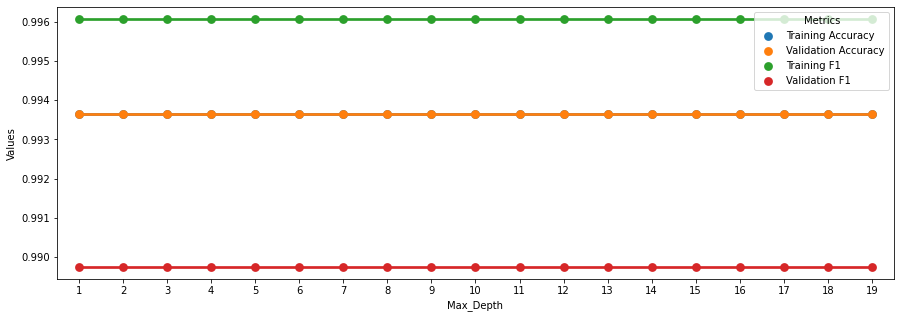

In [60]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")

fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum.

**Visulazing Decision Tree with Max Depth = 3**

In [61]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(558.0, 475.65000000000003, 'X[0] <= -0.773\ngini = 0.307\nsamples = 46119\nvalue = [8717, 37402]'),
 Text(279.0, 339.75, 'X[2] <= 0.346\ngini = 0.058\nsamples = 8960\nvalue = [8692, 268]'),
 Text(139.5, 203.85000000000002, 'X[2] <= -3.873\ngini = 0.032\nsamples = 3007\nvalue = [2958, 49]'),
 Text(69.75, 67.94999999999999, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(209.25, 67.94999999999999, 'gini = 0.031\nsamples = 2987\nvalue = [2940, 47]'),
 Text(418.5, 203.85000000000002, 'X[1] <= -0.273\ngini = 0.071\nsamples = 5953\nvalue = [5734, 219]'),
 Text(348.75, 67.94999999999999, 'gini = 0.159\nsamples = 195\nvalue = [178, 17]'),
 Text(488.25, 67.94999999999999, 'gini = 0.068\nsamples = 5758\nvalue = [5556, 202]'),
 Text(837.0, 339.75, 'X[2] <= -0.667\ngini = 0.001\nsamples = 37159\nvalue = [25, 37134]'),
 Text(697.5, 203.85000000000002, 'X[2] <= -0.835\ngini = 0.002\nsamples = 11775\nvalue = [14, 11761]'),
 Text(627.75, 67.94999999999999, 'gini = 0.001\nsamples = 9723\nval

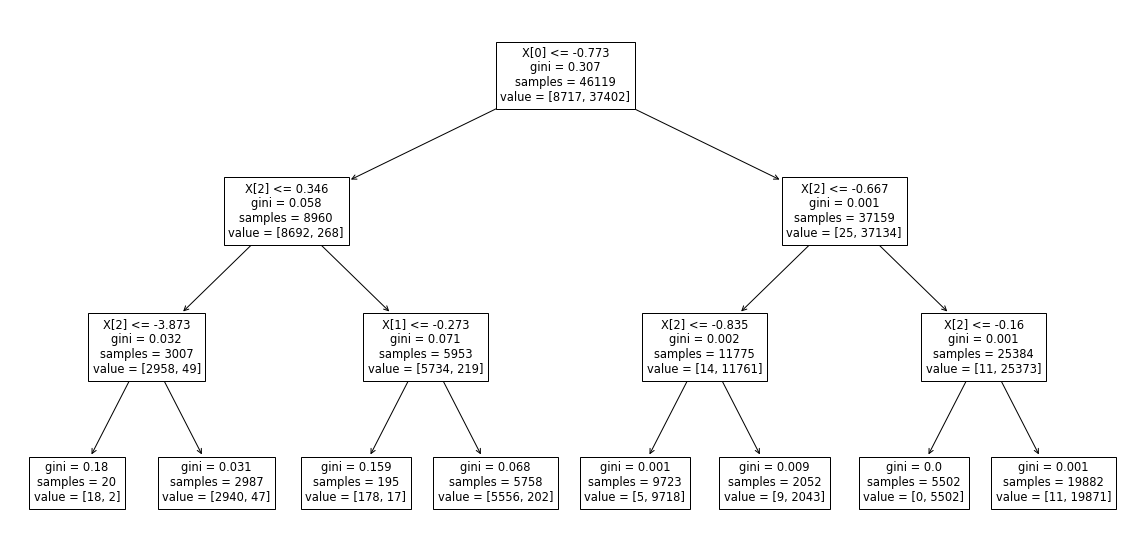

In [62]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clf)

From above tree, we could see that some of the leafs have less than 20 samples hence our classifier might overfit. We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

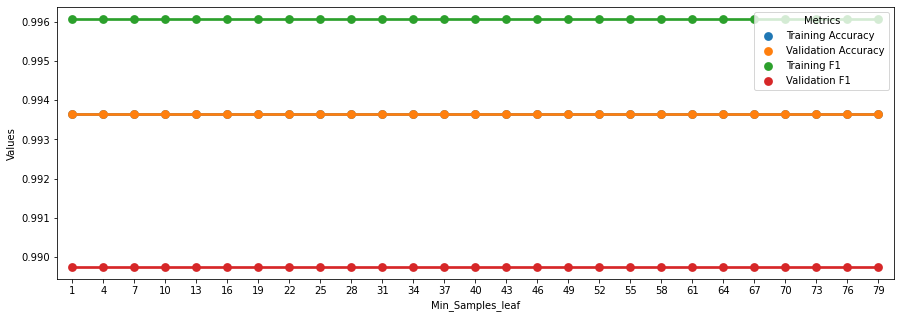

In [63]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

In [64]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.9942339373970346
Test F1 Score:  0.9963936115404431
Confusion Matrix on Test Data


Predicted    0     1   All
True                      
0          480     4   484
1           10  1934  1944
All        490  1938  2428

### GaussianNB: Training

In [196]:
#Train Test Split
#Use train_test_split to split your data into a training set and a testing set
from sklearn.model_selection import train_test_split
features= ['ChgOffDate', 'UrbanRural', 'ApprovalYear']
X=df[features]
y=df['Accept']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [197]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1 0 1 ... 1 0 1]


In [198]:
#Calculate model precision
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1902
           1       1.00      1.00      1.00      7808

    accuracy                           1.00      9710
   macro avg       0.99      1.00      0.99      9710
weighted avg       1.00      1.00      1.00      9710



### GaussianNB: Result

In [17]:
ids_test = df_test_nolabel['id']

features = ['ChgOffDate', 'UrbanRural', 'ApprovalYear']
X=df_test_nolabel[features]
y_pred=model.predict(X)

In [ ]:
results = df_test_nolabel[["id"]]
results["AcceptFloat"] = y_pred
results["Accept"] = results["AcceptFloat"].values.astype(int)
results.drop(['AcceptFloat'], axis=1, inplace=True)
results["id"].size

In [ ]:
results.to_csv("resultsGaussianNB_good.csv", index_label=False, index=False)

### Random Forest



In [ ]:
from sklearn.model_selection import train_test_split
#On divise notre Dataset en Train set et en Test set

train_set, test_set = train_test_split(df, test_size = 0.3, random_state = 0)

In [ ]:
X = df.drop(['Accept', 'id'], axis=1)
y = df['Accept']

In [ ]:
def preprocessing(df):
    
    X = df.drop(['Accept', 'id'], axis=1)
    y = df['Accept']
    
    print(X.shape, y.shape)
    return X,y

In [ ]:
X_train, y_train = preprocessing(train_set) 

In [ ]:
X_train.columns

In [ ]:
X_test, y_test = preprocessing(test_set) 

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
fi = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

In [ ]:
def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,10))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 5 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)
    
    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])

plot_feature_importance(fi)

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report

In [ ]:
# Cross-validationt
cv = KFold(n_splits=5, shuffle=False, random_state=33)
# StratifiedKFold has is a variation of k-fold which returns stratified folds:
# each set contains approximately the same percentage of samples of each target class as the complete set.
#cv = StratifiedKFold(y, n_folds=3, shuffle=False, random_state=33)
scores = cross_val_score(model, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
from sklearn.model_selection import learning_curve

plot_learning_curve(model, "Learning curve with RandomForest", X, y, cv=cv)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print(rf_clf.score(X_test, y_test))
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

In [ ]:
y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
ids_test = df_test_nolabel['id']

features= ['LoanNr_ChkDgt', 'City', 'Bank', 'BankState', 'ApprovalFY', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementGross',
       'DisbursementDay', 'DisbursementMonth', 'DisbursementYear',
       'ApprovalDay', 'ApprovalMonth', 'ApprovalYear']

X=df_test_nolabel[features]
y_pred=rf_clf.predict(X)

In [ ]:
results = df_test_nolabel[["id"]]
results["AcceptFloat"] = y
results["Accept"] = results["AcceptFloat"].values.astype(int)
results.drop(['AcceptFloat'], axis=1, inplace=True)
results["id"].size

In [ ]:
results.to_csv("resultsRandomForest.csv", index_label=False, index=False)

# 4. Result of the competition
### A. Introducción
### B. Modelo Geométrico: KNN
### C. Modelo Decision Tree
### D. Modelo Gaussian NB
-----------------------------------------
### A. Introducción
Una vez disponga de un modelo, deberá usar la plataforma Kaggle para probar su modelo con datos, que combinan datos nuevos con los datos existentes. Puede realizar tantos intentos como desee. 
Razone los resultados en el cuaderno.
### B. Modelo Geométrico: KNN
Knn para 9 vecinos con todas las features preprocesadas
 
      precision    recall  f1-score   support

           0       0.28      0.28      0.28      2817
           1       0.83      0.83      0.83     11748

    accuracy                           0.72     14565
   macro avg       0.55      0.55      0.55     14565
weighted avg       0.72      0.72      0.72     14565

Best score:  0.7972748684351014
Best params:  {'n_neighbors': 9}

  Knn para 9 vecinos con 4 features preprocesadas
  
       precision    recall  f1-score   support

           0       0.36      0.08      0.14      2817
           1       0.81      0.96      0.88     11748

    accuracy                           0.79     14565
   macro avg       0.59      0.52      0.51     14565
weighted avg       0.73      0.79      0.74     14565

Best score:  0.7972748684351014
Best params:  {'n_neighbors': 9}

Knn con 4 features: 0.62095


Con 4 vecinos

                 precision    recall  f1-score   support

           0       0.98      1.00      0.99      1902
           1       1.00      1.00      1.00      7808

    accuracy                           1.00      9710
   macro avg       0.99      1.00      0.99      9710
weighted avg       1.00      1.00      1.00      9710

Con 9 vecinos

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1902
           1       1.00      1.00      1.00      7808

    accuracy                           1.00      9710
   macro avg       0.99      1.00      0.99      9710
weighted avg       1.00      1.00      1.00      9710


### C. Modelo Decision Tree

Decison tree con todas las variables (bueno, las que no tienen nan) preprocesadas 

              precision    recall  f1-score   support

           0       0.71      0.22      0.34      6892
           1       0.84      0.98      0.91     29518

    accuracy                           0.84     36410
   macro avg       0.78      0.60      0.62     36410
weighted avg       0.82      0.84      0.80     36410

Accuracy in training 0.8353474320241692

Best score:  0.8292776709695138
Best params:  {'max_depth': 6}

0.66588 en kaagle 

Decison tree con 4 variables preprocesadas

              precision    recall  f1-score   support

           0       0.71      0.20      0.31      6892
           1       0.84      0.98      0.90     29518

    accuracy                           0.83     36410
   macro avg       0.77      0.59      0.61     36410
weighted avg       0.81      0.83      0.79     36410

0.8155251893315772


Tienen mejor valor en el 0 que el knn

                precision    recall  f1-score   support

           0       0.97      1.00      0.98      8717
           1       1.00      0.99      1.00     37402

    accuracy                           0.99     46119
   macro avg       0.98      0.99      0.99     46119
weighted avg       0.99      0.99      0.99     46119

### D. Modelo Gaussian NB


              precision    recall  f1-score   support

           0       0.36      0.08      0.14      2817
           1       0.81      0.96      0.88     11748

    accuracy                           0.79     14565
   macro avg       0.59      0.52      0.51     14565
weighted avg       0.73      0.79      0.74     14565


Reusltado de kaagle 0.9932

# References

Notebooks de la asignatura